In [227]:
options(repr.plot.width=5, repr.plot.height=4)
library('lmtest')

### <a href='https://ru.coursera.org/learn/ekonometrika/lecture/a0ceR/5-2-5-tiesty-na-ghietieroskiedastichnost-v-r'>Тесты на гетероскедастичность в R</a>

`bptest(model)` --- тест Бройша-Пагана [пакет lmtest]

`bptest(model, varformula = ~ x + I(x^2))` --- классический тест Уайта

`gqtest(model, orber.by = ~x, fraction = 0.2)` --- тест Голдфелда-Квандта (предполагаем возрастание дисперии по `x` и обрасывание 20% центральных наблюдений)

### Модельная ситуация №1

$y = 5 + 2x$

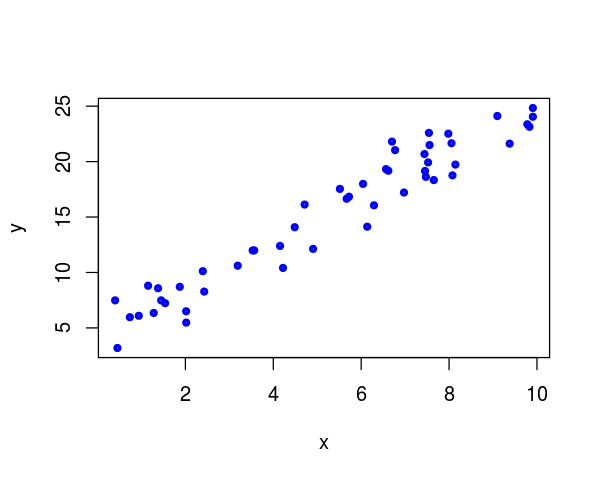

In [230]:
x <- runif(n = 50, min = 0, max = 10)
epsilon <- rnorm(n = 50, sd = 2)
y <- 5 + 2 * x + epsilon

t <- data.frame(matrix(ncol = 2, data = c(x, y)))
colnames(t) <- c('x', 'y')

plot(x, y, cex = 0.5, col = 'blue', lwd = 3)

Обучаем линейную регрессию и считаем остатки

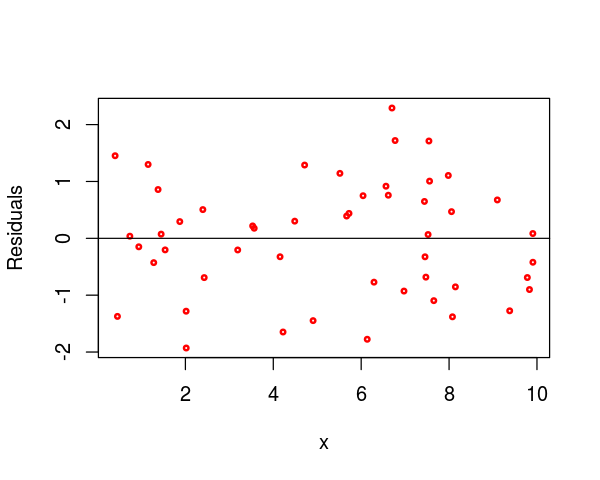

In [231]:
model <- lm(formula = y ~ x, data = t)
res <- rstandard(model)

plot(x, res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

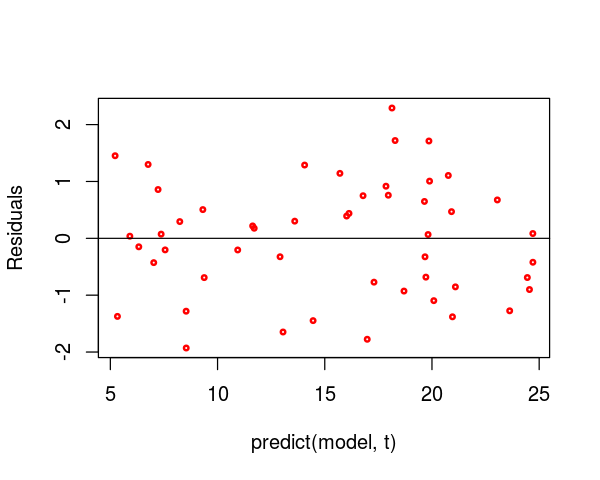

In [232]:
model <- lm(formula = y ~ x, data = t)
res <- rstandard(model)

plot(predict(model, t), res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

In [233]:
bptest(model)
gqtest(model, fraction = 0.2)


	studentized Breusch-Pagan test

data:  model
BP = 0.045287, df = 1, p-value = 0.8315



	Goldfeld-Quandt test

data:  model
GQ = 0.7636, df1 = 18, df2 = 18, p-value = 0.7134
alternative hypothesis: variance increases from segment 1 to 2


Тут все хорошо, то есть ситуация гомоскедастичности.

### Модельная ситуация №2

$y = 20 + 3x - x^2 + 0.1 x^3$

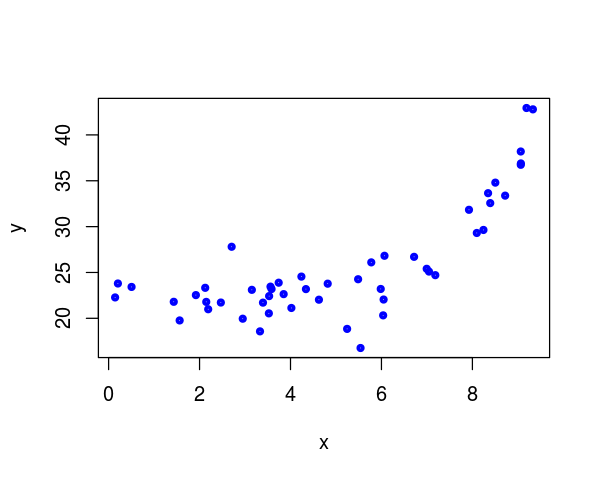

In [234]:
x <- runif(n = 50, min = 0, max = 10)
epsilon <- rnorm(n = 50, sd = 2)
y <- 20 + 3 * x - x^2 + 0.1 * x^3 + epsilon

t <- data.frame(matrix(ncol = 2, data = c(x, y)))
colnames(t) <- c('x', 'y')

plot(x, y, cex = 0.5, col = 'blue', lwd = 3)

Обучаем простую модель

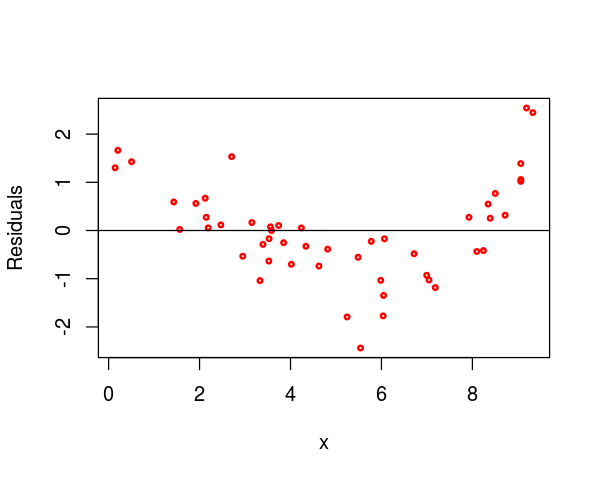

In [235]:
model <- lm(formula = y ~ x, data = t)
res <- rstandard(model)

plot(x, res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

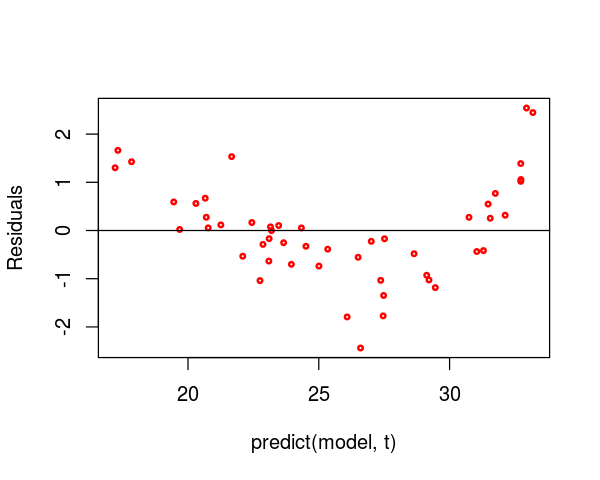

In [236]:
model <- lm(formula = y ~ x, data = t)
res <- rstandard(model)

plot(predict(model, t), res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

По графику остатков можно видеть, что модель выбрана неправильно

In [237]:
bptest(model)
gqtest(model, fraction = 0.2)


	studentized Breusch-Pagan test

data:  model
BP = 2.5888, df = 1, p-value = 0.1076



	Goldfeld-Quandt test

data:  model
GQ = 1.3983, df1 = 18, df2 = 18, p-value = 0.2421
alternative hypothesis: variance increases from segment 1 to 2


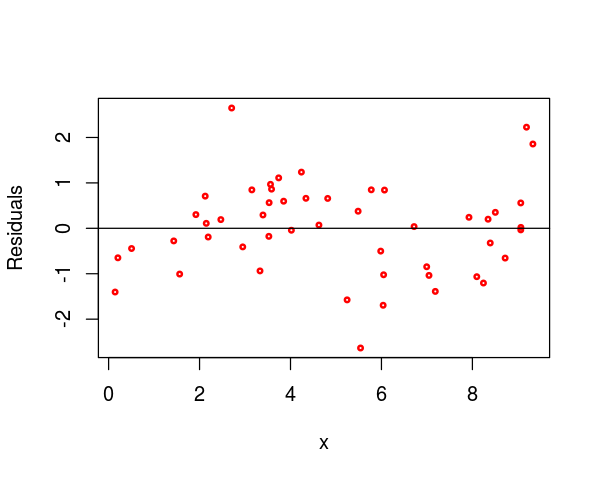

In [238]:
model <- lm(formula = y ~ x + I(x^2), data = t)

res <- rstandard(model)
plot(x, res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

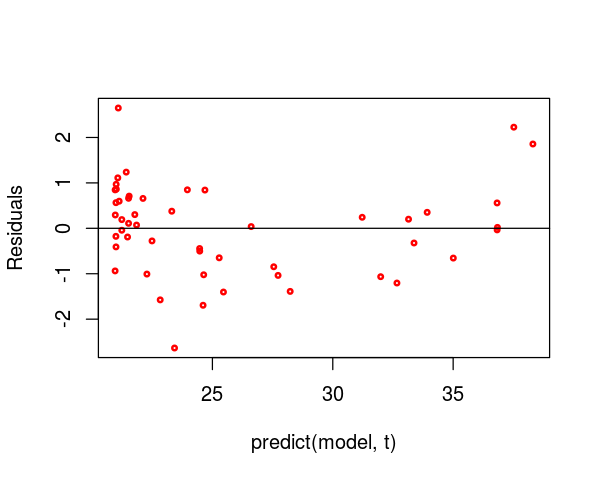

In [239]:
model <- lm(formula = y ~ x + I(x^2), data = t)
res <- rstandard(model)

plot(predict(model, t), res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

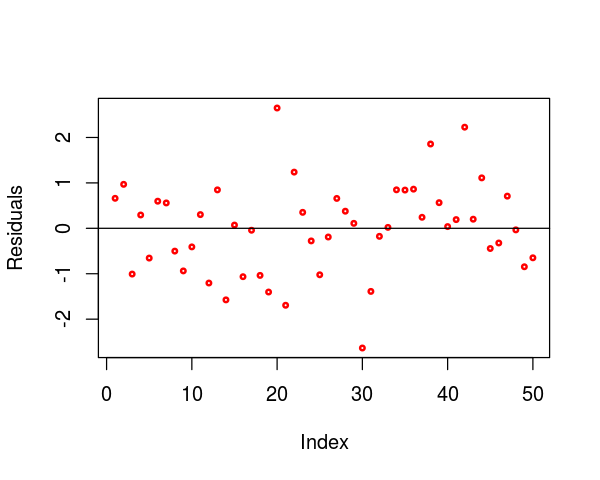

In [240]:
model <- lm(formula = y ~ x + I(x^2), data = t)
res <- rstandard(model)

plot(res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

### Модельная ситуация №3

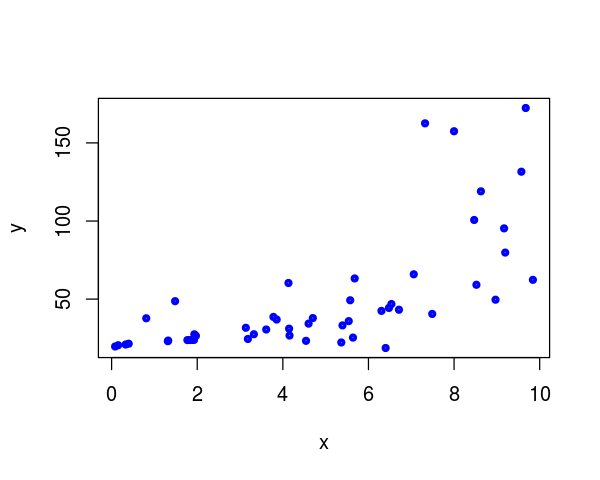

In [241]:
x <- runif(n = 50, min = 0, max = 10)
epsilon <- rnorm(n = 50, sd = 2)
y <- 20 + 3 * x - 0.5 * x^2 + 0.1 * (x + epsilon)^3

t <- data.frame(matrix(ncol = 2, data = c(x, y)))
colnames(t) <- c('x', 'y')

plot(x, y, cex = 0.5, col = 'blue', lwd = 3)

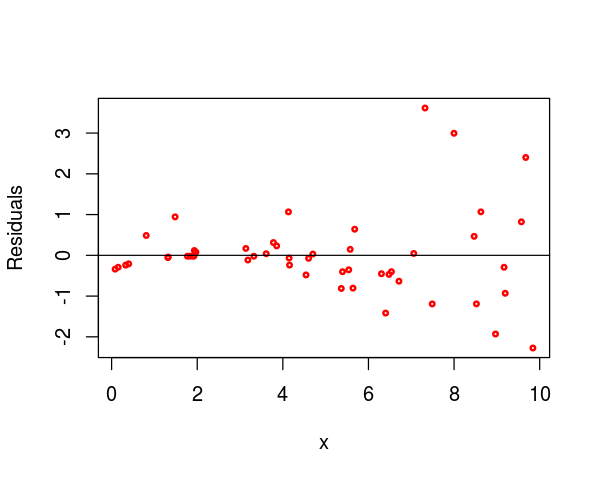

In [242]:
model <- lm(formula = y ~ x + I(x^2), data = t)
res <- rstandard(model)

plot(x, res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

In [243]:
bptest(model)
gqtest(model, fraction = 0.2)


	studentized Breusch-Pagan test

data:  model
BP = 10.124, df = 2, p-value = 0.006333



	Goldfeld-Quandt test

data:  model
GQ = 0.44308, df1 = 17, df2 = 17, p-value = 0.9487
alternative hypothesis: variance increases from segment 1 to 2


### Модельная ситуация №4

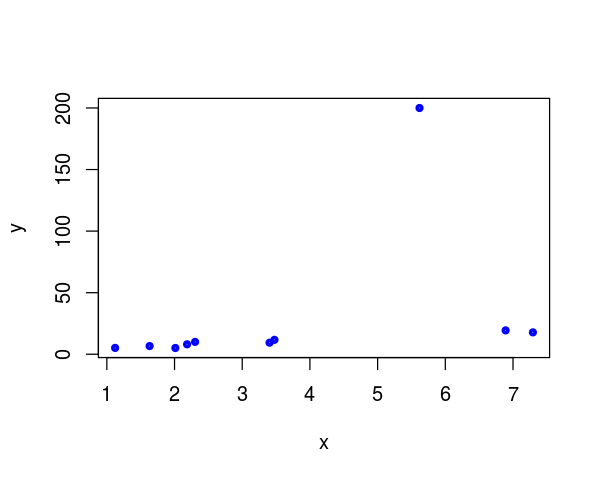

In [244]:
x <- runif(n = 10, min = 0, max = 10)
epsilon <- rnorm(n = 10, sd = 2)
y <- 5 + 2 * x + epsilon
y[10] <- 200

t <- data.frame(matrix(ncol = 2, data = c(x, y)))
colnames(t) <- c('x', 'y')

plot(x, y, cex = 0.5, col = 'blue', lwd = 3)

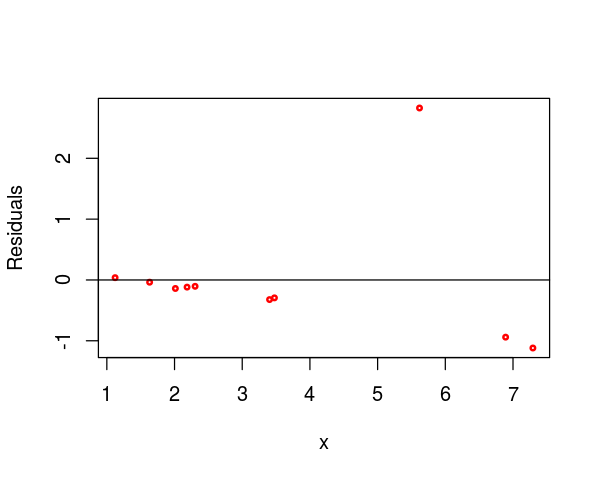

In [245]:
model <- lm(formula = y ~ x, data = t)
res <- rstandard(model)

plot(x, res, ylab = "Residuals", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

In [246]:
bptest(model)
gqtest(model, fraction = 0.2)


	studentized Breusch-Pagan test

data:  model
BP = 1.9199, df = 1, p-value = 0.1659



	Goldfeld-Quandt test

data:  model
GQ = 2735.7, df1 = 2, df2 = 2, p-value = 0.0003654
alternative hypothesis: variance increases from segment 1 to 2


## Датасет Yacht Hydrodynamics
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics#

Для парусных яхт нужно предсказать остаточное сопротивление на единицу массы смещения от размеров яхты и ее скорости.

In [247]:
t <- read.table('yacht_hydrodynamics.data', sep = ',', header = TRUE)
t[1:5,]

Longitudinal_position,Prismatic_coefficient,Length.displacement_ratio,Beam.draught_ratio,Length.beam_ratio,Froude_number,Residuary_resistance
-2.3,0.568,4.78,3.99,3.17,0.125,0.11
-2.3,0.568,4.78,3.99,3.17,0.150,0.27
-2.3,0.568,4.78,3.99,3.17,0.175,0.47
-2.3,0.568,4.78,3.99,3.17,0.200,0.78
-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [248]:
library(caret)

a <- createDataPartition(t$Residuary_resistance, p = 0.7, list=FALSE)
train <- t[a,]
test <- t[-a,]

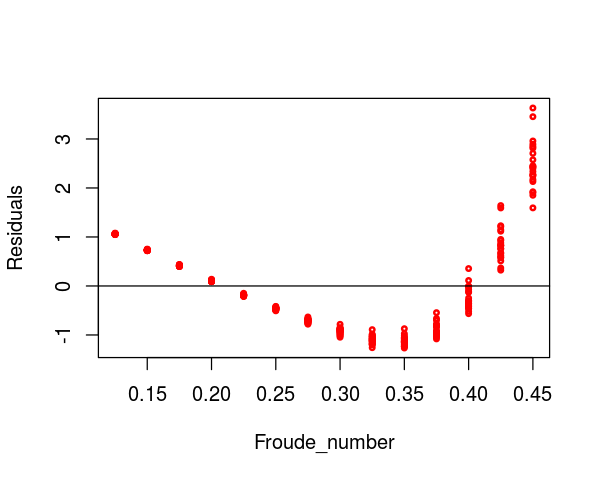

In [249]:
model <- lm(formula = Residuary_resistance ~ Froude_number, data = t)
res <- rstandard(model)

plot(t$Froude_number, res, ylab = "Residuals", xlab="Froude_number", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

In [250]:
bptest(model)
gqtest(model, fraction = 0.2)


	studentized Breusch-Pagan test

data:  model
BP = 62.16, df = 1, p-value = 3.166e-15



	Goldfeld-Quandt test

data:  model
GQ = 1.2742, df1 = 122, df2 = 121, p-value = 0.09164
alternative hypothesis: variance increases from segment 1 to 2


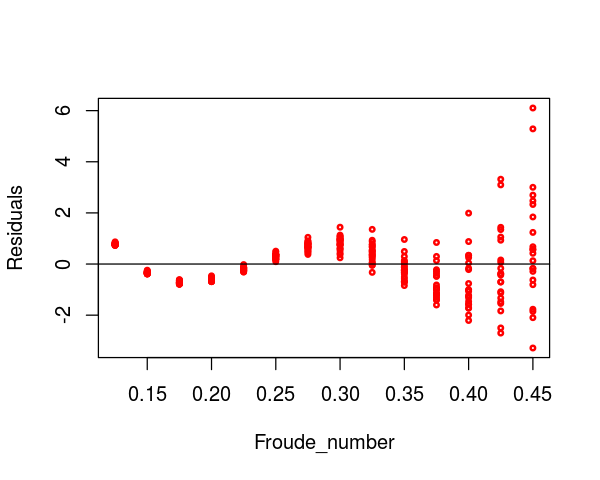

In [252]:
model <- lm(formula = Residuary_resistance ~ poly(Froude_number, 3), data = t)
res <- rstandard(model)

plot(t$Froude_number, res, ylab = "Residuals", xlab="Froude_number", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)

Как избавиться от гетероскедастичности? Логарифмирование

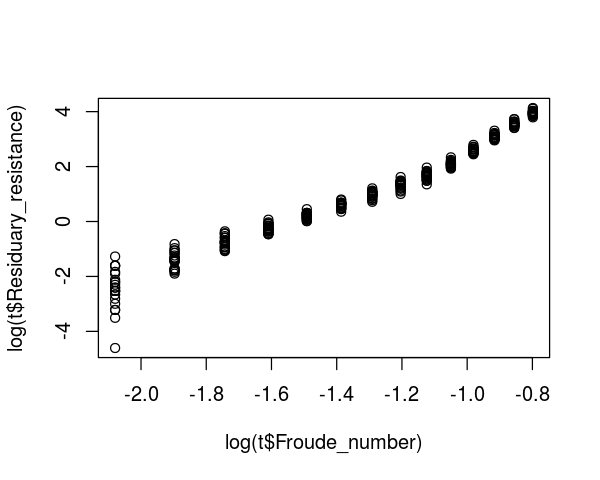

In [253]:
plot(log(t$Residuary_resistance) ~ log(t$Froude_number))

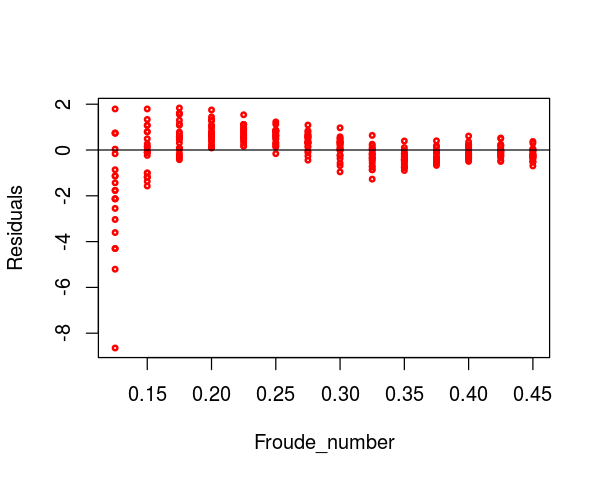

In [254]:
model <- lm(formula = log(Residuary_resistance) ~ Froude_number, data = t)
res <- rstandard(model)

plot(t$Froude_number, res, ylab = "Residuals", xlab="Froude_number", cex = 0.5, col = 'red', lwd = 2) 
abline(0, 0)